In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv


# **Reading Dataset**

In [2]:
#Reading data
data=pd.read_csv('/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv')
data.shape

(539383, 9)

In [3]:
#First 5 Row displayed
data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


# **Data Inspecting and Cleaning**

In [5]:
data.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

No null values found

In [6]:
data.duplicated().sum()

0

NO dublicate value found

**Outlier Detection**

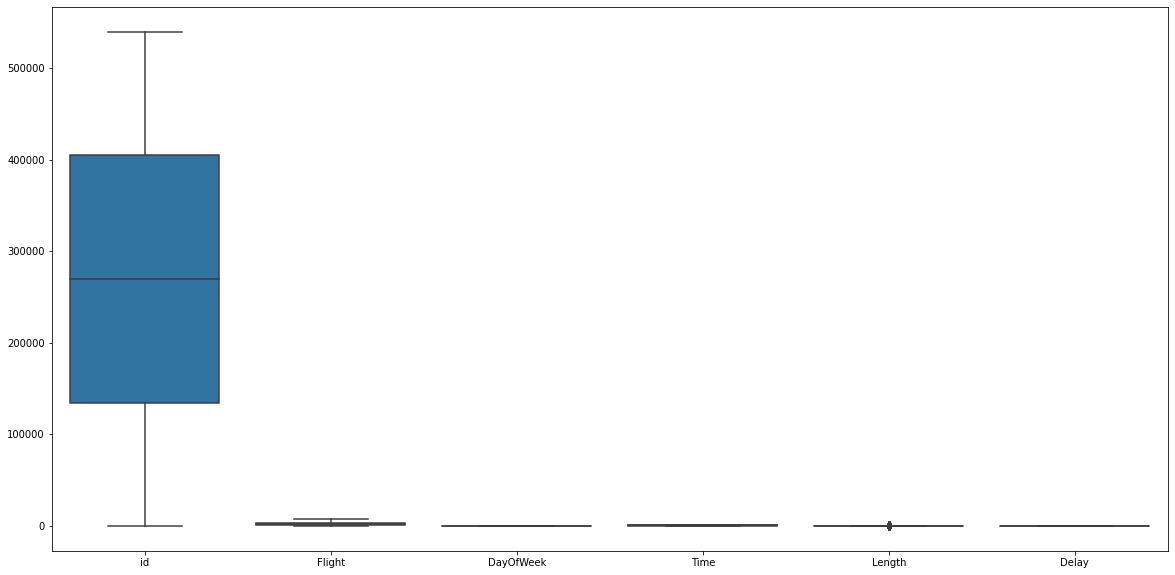

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10),facecolor='w')
sns.boxplot(data=data)
plt.show()

NO outlier found, first colum is id so it does not matter 

# **Exploratory Data Analysis**

In [8]:
data.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


An overall Statistical Information is shown
* It is clearly evident that none of the data is missing in columns.
* It also shows the mean, standard deviation and other statistical metrices of the dataset 
* It also shows the categorical data of the dataset since they were already converted into discrete numerical values

,id,Flight,DayOfWeek,Time,Length,Delay
id,1.000000,-0.006156,-0.055474,0.029156,0.020781,0.139762
Flight,-0.006156,1.000000,0.000416,-0.005750,-0.341481,-0.046175
DayOfWeek,-0.055474,0.000416,1.000000,0.001273,0.013397,-0.026199
Time,0.029156,-0.005750,0.001273,1.000000,-0.020612,0.150454
Length,0.020781,-0.341481,0.013397,-0.020612,1.000000,0.040489
Delay,0.139762,-0.046175,-0.026199,0.150454,0.040489,1.000000


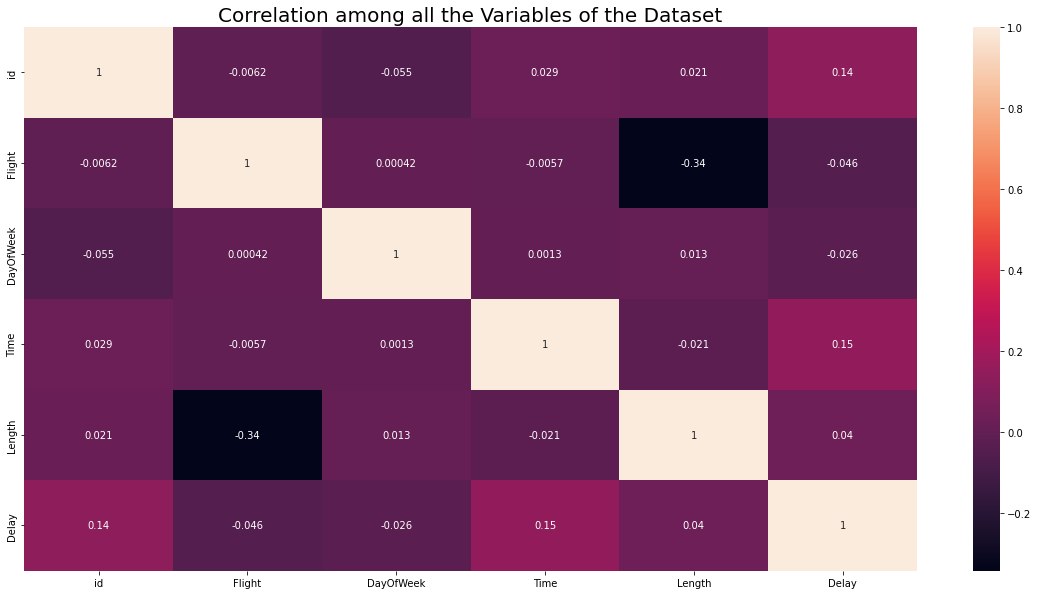

In [9]:
#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10),facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

## **Data visualization**

**Univariate Analysis**

In [10]:
data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [11]:
features=['Airline','Flight','AirportFrom','AirportTo','DayOfWeek','Time']

In [12]:
data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


# **Resampling imbalanced dataset by oversampling positive cases**

In [13]:
target1=data[data['Delay']==1]
target0=data[data['Delay']==0]

In [14]:
from sklearn.utils import resample
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])
target['Delay'].value_counts()

0    299119
1    299119
Name: Delay, dtype: int64

In [15]:
data=target
np.shape(data)

(598238, 9)

In [16]:
X=data.iloc[:,0:8]
y=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (598238, 8) 
y -  (598238,)


In [17]:
from sklearn.model_selection import train_test_split
X=data.drop(['Delay'], axis=1) #features 

y=data['Delay'] #label or target variable
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier